In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


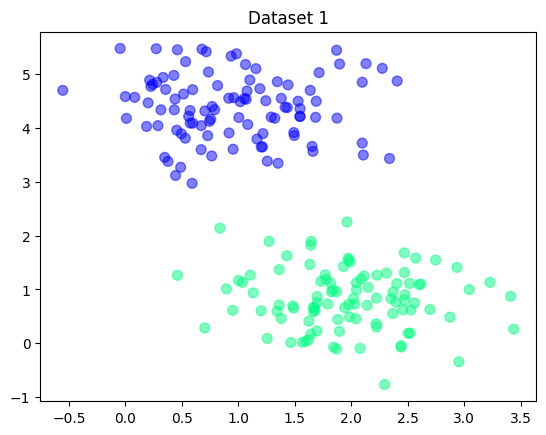

In [2]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[-0.48195252  0.86208263]
 [ 1.87295277  0.04308561]
 [-0.01491146  0.23284991]
 [ 0.39307433 -0.32748166]
 [ 0.18546665 -0.17439279]]  
 y2 :
 [ 1  1  1  1 -1]


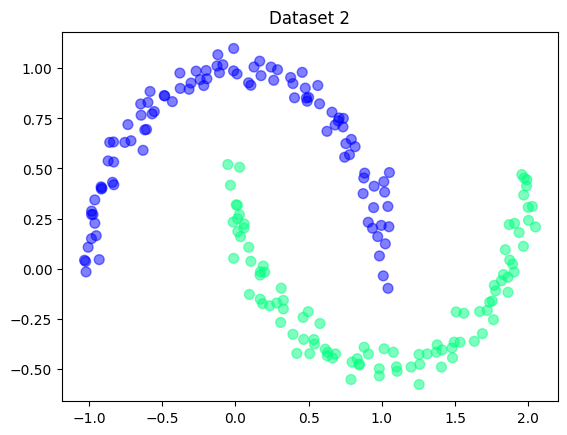

In [3]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

First five rows and col values 
X1 : 
 [[-5.75045745e-02 -4.86290453e-01]
 [ 6.40475680e-04 -9.46150299e-01]
 [-4.67433822e-01  8.21503658e-02]
 [ 3.42727989e-01 -3.78028703e-01]
 [-5.29575483e-01  5.80495850e-02]]  
 y3 :
 [ 1  1  1  1 -1]


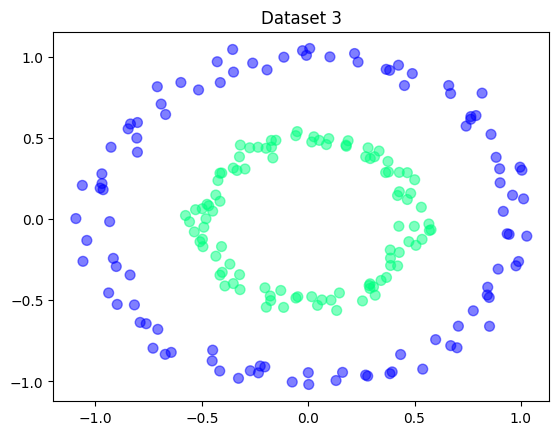

In [4]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

For a n-dimensional feature, SVM creates an n-1 dimensional hyperplane to separate the classes. Any hyperplane can be represented as:

$$ w^TX - b = 0 $$

For example, if we have a dataset which can be represented by a line, the hyperplane would be a point. In our case, we have 2 independent and 1 dependent feature. Thus, our hyperplane is a line with the equation:

$$ y = w_1X_1 + w_2X_2 - b $$

where $ w = [w_1, w_2] $.

We will proceed with the assumption that $m_1$, $m_2$, and $b$ are 0s, and we will update their value in accordance with the learning rate.

### Hard Margin

If the dataset can be linearly separated like our first dataset and partially in the second, we can create two parallel hyperplanes (lines here) for each class and contain each data point under these hyperplanes. Our goal would be to maximize the distance between these two parallel hyperplanes. The region between these two planes is called the **margin**. The equations for both hyperplanes are:

$$ w^TX - b = -1 $$
$$ w^TX - b = 1 $$

The distance between them is $ \frac{2}{\|w\|} $, and to maximize the distance, $\|w\|$ should be minimum.

To prevent any data point from falling inside the margin, we add the restriction:

$$ y_i(w^TX_i - b) \geq 1 $$

where $y_i$ is the ith row in the target and $X_i$ is the ith row in $X$.

### Soft Margin

If the dataset is non-linearly separable (dataset 2 and 3, **note**: if in dataset 1, one or more points are in the wrong classes, then it is also non-linear), we can use hinge loss for the loss function:

$$ \text{max}(0, 1-y_i(w^TX_i - b)) $$

If the data point has class = 1, then the loss will be 0; otherwise, it will be the distance between the margin and the data point.

Our goal is to minimize:

$$ \text{Loss} = \frac{1}{n} \sum \text{max}(0, 1-y_i(w^TX_i - b)) + \lambda \|w\|^2 $$

where $ \lambda $ is a tradeoff between the margin size and $x_i$ being on the correct side of the margin. If $ \lambda $ is too low, the equation becomes a hard margin.

#### Updating weights

Let's define how we are updating weights by differentiating both terms in the loss with $w_k$:

First term:

$$ \frac{\partial \text{max}(0, 1-y_i(w^TX_i - b))}{\partial w_k} = \begin{cases} 0, & \text{if } y_ix_iw -b \geq 1 \\ -y_ix_i, & \text{otherwise} \end{cases} $$

Second term:

$$ \frac{\partial(\lambda\|w\|^2)}{\partial w_k} = 2\lambda w_k $$

If $y_ix_iw-b \geq 1$:

$$ w = w - \alpha 2\lambda w $$

otherwise,

$$ w = w + \alpha (2\lambda w - y_ix_i) $$

#### Updating intercept

Differentiate the loss by $b$:

First term:

$$ \frac{\partial \text{max}(0, 1-y_i(w^TX_i - b))}{\partial b} = \begin{cases} 0, & \text{if } y_ix_iw -b \geq 1 \\ -y_i, & \text{otherwise} \end{cases} $$

Second term:

$$ \frac{\partial(\lambda\|w\|^2)}{\partial b} = 0 $$

If $y_ix_iw-b \geq 1$:

$$ b = b + \alpha 0 $$

otherwise,

$$ b = b - \alpha y_i $$


In [5]:
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [6]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [7]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, score: 1.0


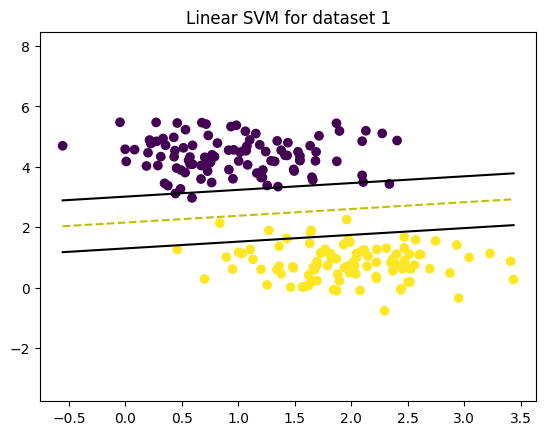

In [8]:
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y1))
plot_svm(X1, y1, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 2, score: 0.88


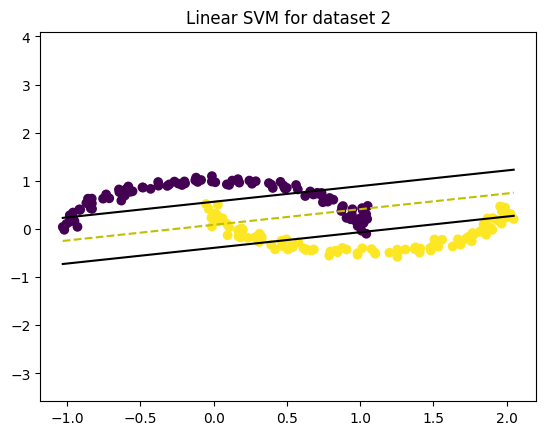

In [9]:
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y2)
print("For dataset 2, score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')

For dataset 3, score: 0.49


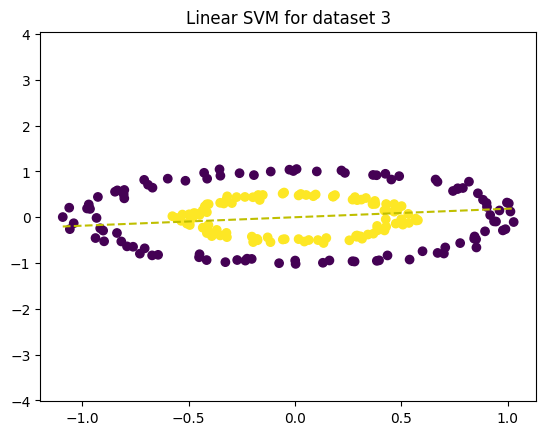

In [10]:
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y3)
print("For dataset 3, score:" ,accuracy_score(svm3.predict(X3),y3))
plot_svm(X3, y3, w3, b3, title= 'Linear SVM for dataset 3')